# Finding the Best Markets to Advertise In
Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.options.display.max_columns = 140
pd.options.display.max_colwidth = 50


## Read data

In [2]:
fcc_survey = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory = False, encoding = "latin-1")

fcc_survey.shape

(18175, 136)

In [3]:
fcc_survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

## Relevant columns

After the data read, we can see that we have 136 columns and it's a lot to analyze. Due to not all of them will be relevant, let's keep only usefull columns.

In [4]:
relevant_survey = fcc_survey[["Age","CityPopulation","CountryLive","EmploymentField","EmploymentStatus","Gender","HasChildren","HasHighSpdInternet","Income", "IsEthnicMinority",
                       "JobInterestBackEnd", "JobInterestDataEngr", 
                       "JobInterestDataSci", "JobInterestDevOps", "JobInterestFrontEnd", 
                       "JobInterestFullStack", "JobInterestGameDev", "JobInterestInfoSec",
                       "JobInterestMobile", "JobInterestQAEngr", "JobInterestUX",
                       "JobPref", "JobRelocateYesNo", "MoneyForLearning",
                       "SchoolDegree", "SchoolMajor"]].copy()

In [5]:
relevant_survey.head()

,Age,CityPopulation,CountryLive,EmploymentField,EmploymentStatus,Gender,HasChildren,HasHighSpdInternet,Income,IsEthnicMinority,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,MoneyForLearning,SchoolDegree,SchoolMajor
0,27.0,more than 1 million,Canada,software development and IT,Employed for wages,female,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,150.0,"some college credit, no degree",NaN
1,34.0,"less than 100,000",United States of America,NaN,Not working but looking for work,male,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,80.0,"some college credit, no degree",NaN
2,21.0,more than 1 million,United States of America,software development and IT,Employed for wages,male,NaN,1.0,13000.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,work for a medium-sized company,1.0,1000.0,high school diploma or equivalent (GED),NaN
3,26.0,"between 100,000 and 1 million",Brazil,software development and IT,Employed for wages,male,0.0,1.0,24000.0,0.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,work for a medium-sized company,NaN,0.0,"some college credit, no degree",NaN
4,20.0,"between 100,000 and 1 million",Portugal,NaN,Not working but looking for work,female,NaN,1.0,NaN,0.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,work for a multinational corporation,1.0,0.0,bachelor's degree,Information Technology


Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

The *"JobRoleInterest"* column describes for every participant the role(s) they'd be interested in working. Firstly, let's merge all JobInterest columns into one

In [6]:
#create an expression to extract the roles
job_int_pattern = "JobInterest(\w+)"
job_interests = [re.findall(job_int_pattern, column)[0] for column in relevant_survey.columns if re.findall(job_int_pattern, column) != []]
print(job_interests)

['BackEnd', 'DataEngr', 'DataSci', 'DevOps', 'FrontEnd', 'FullStack', 'GameDev', 'InfoSec', 'Mobile', 'QAEngr', 'UX']


In [7]:
#rename columns according to their roles
relevant_survey.rename({"JobInterestBackEnd":"BackEnd",
                        "JobInterestDataEngr":"DataEngr",
                        "JobInterestDataSci":"DataSci",
                        "JobInterestDevOps":"DevOps",
                        "JobInterestFrontEnd":"FrontEnd",
                        "JobInterestFullStack":"FullStack",
                        "JobInterestGameDev":"GameDev",
                        "JobInterestInfoSec":"InfoSec",
                        "JobInterestMobile":"Mobile",
                        "JobInterestQAEngr":"QAEngr",
                        "JobInterestUX":"UX"}, axis = 1, inplace = True)

for job in job_interests: 
    relevant_survey[job].replace({np.nan : False, 1.0: True}, inplace = True)
    
#define the function that store all job interesets into one list instead of separate each
def interest_merge(row):
    job_interest = []
    
    for job in job_interests: 
        if row.loc[job] == True:
            job_interest.append(job)
    if len(job_interest) > 0:
        return job_interest
    else:
        return np.nan

relevant_survey["Job Interest"] = relevant_survey.apply(interest_merge, axis =1)
relevant_survey["Job Interest"].head()

0                                                NaN
1                                        [FullStack]
2     [BackEnd, DevOps, FrontEnd, FullStack, Mobile]
3                     [BackEnd, FrontEnd, FullStack]
4    [BackEnd, FrontEnd, FullStack, InfoSec, Mobile]
Name: Job Interest, dtype: object

In [8]:
#Let's drop all JobInterest's columns because we don't need them anymore
relevant_survey.drop(job_interests, axis =1, inplace = True)

In [9]:
print(relevant_survey.columns)

Index(['Age', 'CityPopulation', 'CountryLive', 'EmploymentField',
       'EmploymentStatus', 'Gender', 'HasChildren', 'HasHighSpdInternet',
       'Income', 'IsEthnicMinority', 'JobPref', 'JobRelocateYesNo',
       'MoneyForLearning', 'SchoolDegree', 'SchoolMajor', 'Job Interest'],
      dtype='object')


## Check Other Columns

In [10]:
relevant_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 16 columns):
Age                   15367 non-null float64
CityPopulation        15354 non-null object
CountryLive           15336 non-null object
EmploymentField       8116 non-null object
EmploymentStatus      14345 non-null object
Gender                15454 non-null object
HasChildren           3858 non-null float64
HasHighSpdInternet    15380 non-null float64
Income                7623 non-null float64
IsEthnicMinority      15293 non-null float64
JobPref               13483 non-null object
JobRelocateYesNo      6503 non-null float64
MoneyForLearning      16577 non-null float64
SchoolDegree          15368 non-null object
SchoolMajor           8727 non-null object
Job Interest          7927 non-null object
dtypes: float64(7), object(9)
memory usage: 2.2+ MB


In [11]:
relevant_survey["Age"].describe()

count    15367.000000
mean        27.691872
std          8.559239
min          0.000000
25%         22.000000
50%         26.000000
75%         32.000000
max         90.000000
Name: Age, dtype: float64

In [12]:
relevant_survey.Age.value_counts(dropna = False).sort_index(ascending = False)

 90.0       1
 76.0       1
 75.0       1
 73.0       1
 72.0       2
 71.0       3
 70.0       6
 69.0       5
 68.0       3
 67.0       1
 66.0       2
 65.0       2
 64.0       1
 63.0       7
 62.0       8
 61.0      15
 60.0      17
 59.0      22
 58.0      24
 57.0      24
 56.0      21
 55.0      30
 54.0      29
 53.0      34
 52.0      29
 51.0      21
 50.0      80
 49.0      57
 48.0      59
 47.0      87
         ... 
 32.0     474
 31.0     456
 30.0     620
 29.0     648
 28.0     728
 27.0     852
 26.0     933
 25.0     922
 24.0     994
 23.0     895
 22.0     853
 21.0     840
 20.0     742
 19.0     587
 18.0     459
 17.0     319
 16.0     234
 15.0     164
 14.0      92
 13.0      54
 12.0      30
 11.0       7
 10.0       3
 8.0        2
 5.0        1
 3.0        1
 2.0        2
 1.0        2
 0.0        4
NaN      2808
Name: Age, Length: 74, dtype: int64

We have to drop all incorrect ages which are lower than 10 years old

In [13]:
relevant_survey = relevant_survey[(relevant_survey["Age"] >= 10) | (relevant_survey["Age"].isnull())]
relevant_survey.Age.value_counts(dropna = False).sort_index(ascending = False).tail()

 13.0      54
 12.0      30
 11.0       7
 10.0       3
NaN      2808
Name: Age, dtype: int64

In [14]:
relevant_survey["CityPopulation"].value_counts(dropna = False)
#let's rename this column to be more suitable for plotting
relevant_survey["CityPopulation"].replace({"more than 1 million":"Great",
                                          "between 100,000 and 1 million":"Medium",
                                          "less than 100,000" : "Small"}, inplace = True)

relevant_survey["CityPopulation"].value_counts(dropna = False)

Great     6529
Medium    5275
Small     3541
NaN       2818
Name: CityPopulation, dtype: int64

In [15]:
relevant_survey.CountryLive.value_counts(dropna = False)

United States of America         5790
NaN                              2837
India                            1400
United Kingdom                    757
Canada                            614
Brazil                            364
Germany                           324
Poland                            265
Russia                            262
Australia                         259
France                            228
Spain                             217
Nigeria                           213
Ukraine                           201
Romania                           171
Italy                             164
Mexico                            155
Netherlands (Holland, Europe)     142
Philippines                       135
South Africa                      126
Turkey                            120
Greece                            116
Serbia                            115
Argentina                         113
Pakistan                          109
Kenya                              92
Indonesia   

In [16]:
relevant_survey.EmploymentField.value_counts(dropna = False).sort_index()

architecture or physical engineering       202
arts, entertainment, sports, or media      372
construction and extraction                129
education                                  626
farming, fishing, and forestry              38
finance                                    264
food and beverage                          386
health care                                324
law enforcement and fire and rescue         40
legal                                       70
office and administrative support          361
sales                                      415
software development and IT               4718
transportation                             167
NaN                                      10051
Name: EmploymentField, dtype: int64

In [17]:
relevant_survey.EmploymentStatus.value_counts(dropna = False).sort_index()

A stay-at-home parent or homemaker       214
Doing an unpaid internship               339
Employed for wages                      7620
Military                                  87
Not working and not looking for work     906
Not working but looking for work        3147
Retired                                   32
Self-employed business owner             534
Self-employed freelancer                1198
Unable to work                           261
NaN                                     3825
Name: EmploymentStatus, dtype: int64

In [18]:
relevant_survey.Gender.value_counts(dropna = False).sort_index()

agender           37
female          2929
genderqueer       71
male           12340
trans             68
NaN             2718
Name: Gender, dtype: int64

In [19]:
relevant_survey.HasChildren.value_counts(dropna = False).sort_index()
#Too much missing values, let's drop the column
relevant_survey.drop("HasChildren",axis = 1 ,inplace = True)

In [20]:
relevant_survey.HasHighSpdInternet.value_counts(dropna = False).sort_index()

 0.0     2230
 1.0    13141
NaN      2792
Name: HasHighSpdInternet, dtype: int64

In [21]:
relevant_survey.Income.value_counts(dropna = False).sort_index()

 6000.0         204
 6120.0           1
 6150.0           1
 6163.0           1
 6200.0           1
 6240.0           2
 6250.0           1
 6263.0           1
 6290.0           1
 6300.0           3
 6335.0           1
 6336.0           1
 6376.0           1
 6400.0           3
 6411.0           1
 6444.0           1
 6480.0           2
 6500.0          13
 6511.0           1
 6548.0           1
 6556.0           1
 6600.0           7
 6666.0           1
 6700.0           2
 6783.0           1
 6800.0           1
 6857.0           1
 6969.0           1
 7000.0          90
 7075.0           1
              ...  
 175000.0         2
 176800.0         1
 180000.0        11
 183000.0         1
 185000.0         1
 186000.0         1
 190000.0         1
 200000.0        33
 205000.0         1
 210000.0         1
 220000.0         1
 240000.0         2
 246212.0         1
 250000.0         3
 272349.0         1
 280000.0         1
 300000.0         8
 305927.0         1
 318512.0         1


In [22]:
relevant_survey.IsEthnicMinority.value_counts(dropna = False).sort_index()

 0.0    11647
 1.0     3637
NaN      2879
Name: IsEthnicMinority, dtype: int64

In [23]:
relevant_survey.JobPref.value_counts(dropna = False).sort_index()

freelance                               2619
start your own business                 2778
work for a government                    366
work for a medium-sized company         2977
work for a multinational corporation    1700
work for a nonprofit                     834
work for a startup                      2199
NaN                                     4690
Name: JobPref, dtype: int64

In [24]:
relevant_survey.JobPref.value_counts(dropna = False).sort_index()

freelance                               2619
start your own business                 2778
work for a government                    366
work for a medium-sized company         2977
work for a multinational corporation    1700
work for a nonprofit                     834
work for a startup                      2199
NaN                                     4690
Name: JobPref, dtype: int64

In [25]:
relevant_survey.JobRelocateYesNo.value_counts(dropna = False).sort_index()

 0.0     1482
 1.0     5017
NaN     11664
Name: JobRelocateYesNo, dtype: int64

In [26]:
relevant_survey.MoneyForLearning.value_counts(dropna = False).sort_index()

 0.0         7982
 1.0           22
 2.0            4
 3.0            8
 4.0            7
 5.0           40
 6.0            5
 7.0            1
 8.0            6
 9.0            4
 10.0         211
 12.0           9
 13.0           5
 14.0           1
 15.0         103
 16.0           1
 17.0           1
 18.0           5
 19.0          13
 20.0         314
 21.0           2
 22.0           5
 23.0           6
 24.0           2
 25.0          68
 26.0           2
 27.0           2
 28.0           1
 29.0           5
 30.0         201
             ... 
 20000.0       57
 21000.0        1
 22000.0        4
 23000.0        4
 24310.0        1
 24500.0        1
 25000.0       15
 26000.0        1
 27000.0        1
 28000.0        1
 30000.0       15
 31337.0        1
 35000.0        2
 36000.0        1
 40000.0        3
 45000.0        2
 50000.0        4
 60000.0        3
 65000.0        1
 69000.0        1
 70000.0        1
 80000.0        1
 90000.0        1
 99999.0        1
 100000.0 

In [27]:
relevant_survey.SchoolDegree.value_counts(dropna = False).sort_index()

Ph.D.                                        132
associate's degree                           641
bachelor's degree                           5848
high school diploma or equivalent (GED)     1871
master's degree (non-professional)          1468
no high school (secondary school)            405
professional degree (MBA, MD, JD, etc.)      775
some college credit, no degree              2602
some high school                            1112
trade, technical, or vocational training     504
NaN                                         2805
Name: SchoolDegree, dtype: int64

In [28]:
relevant_survey.SchoolMajor.value_counts(dropna = False).sort_index()

Accounting                                        115
Accounting Technician and Bookkeeping              10
Acting                                              7
Actuarial Science                                   6
Acupuncture                                         1
Acupuncture and Oriental Medicine                   2
Administrative Assistant                            4
Adult Development and Aging                         1
Adult Health Nursing                                1
Adult and Continuing Education                      3
Advanced Dentistry and Oral Sciences                1
Advertising                                        15
Advertising and Marketing                          19
Aeronautics and Aviation Technology                 4
Aerospace Engineering Technician                    1
Aerospace and Aeronautical Engineering             30
African American Studies                            3
African Studies                                     1
Agricultural Business and Te

Since the some columns have too many missing values, there is no reason to keep them. Also, these columns are not so important for us, so we can drop them:  
- EmploymentField
- JobRelocateYesNo
- SchoolMajor
- Income

In [29]:
relevant_survey.drop(columns= ["EmploymentField","JobRelocateYesNo","SchoolMajor","Income"], inplace = True)

For now, we will sort our dataframe again, to see only non null values in "Job Interest" column.

In [30]:
nonull_survey = relevant_survey[relevant_survey["Job Interest"].notnull()].copy()
nonull_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7921 entries, 1 to 18174
Data columns (total 11 columns):
Age                   6649 non-null float64
CityPopulation        6647 non-null object
CountryLive           6646 non-null object
EmploymentStatus      6114 non-null object
Gender                6701 non-null object
HasHighSpdInternet    6672 non-null float64
IsEthnicMinority      6614 non-null float64
JobPref               7843 non-null object
MoneyForLearning      7269 non-null float64
SchoolDegree          6652 non-null object
Job Interest          7921 non-null object
dtypes: float64(4), object(7)
memory usage: 742.6+ KB


Now we can clear rows that have too many missing values

In [31]:
nonull_survey.dropna(axis = 0, thresh = 7, inplace = True)
nonull_survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6725 entries, 1 to 18174
Data columns (total 11 columns):
Age                   6637 non-null float64
CityPopulation        6638 non-null object
CountryLive           6640 non-null object
EmploymentStatus      6111 non-null object
Gender                6682 non-null object
HasHighSpdInternet    6664 non-null float64
IsEthnicMinority      6608 non-null float64
JobPref               6667 non-null object
MoneyForLearning      6256 non-null float64
SchoolDegree          6642 non-null object
Job Interest          6725 non-null object
dtypes: float64(4), object(7)
memory usage: 630.5+ KB


After we cleaned dataframe from missing values, we would like to know which customers are potentinal, because as we remebmer the column "MoneyForLearning" has wide spread of values and some of them don't look realistic. Let's specify this column

In [32]:
potentional_customers = nonull_survey[(nonull_survey["MoneyForLearning"] <= 7000)
                                     & (nonull_survey["MoneyForLearning"] > 20)]

In [33]:
potentional_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2707 entries, 1 to 18160
Data columns (total 11 columns):
Age                   2686 non-null float64
CityPopulation        2682 non-null object
CountryLive           2674 non-null object
EmploymentStatus      2549 non-null object
Gender                2694 non-null object
HasHighSpdInternet    2687 non-null float64
IsEthnicMinority      2679 non-null float64
JobPref               2684 non-null object
MoneyForLearning      2707 non-null float64
SchoolDegree          2682 non-null object
Job Interest          2707 non-null object
dtypes: float64(4), object(7)
memory usage: 253.8+ KB


In [34]:
pd.set_option('mode.chained_assignment', None)
potentional_customers[["HasHighSpdInternet","IsEthnicMinority"]] = potentional_customers[["HasHighSpdInternet","IsEthnicMinority"]].replace({1.0 : True, 0.0 : False, np.nan : False})

In [35]:
potentional_customers.head()

,Age,CityPopulation,CountryLive,EmploymentStatus,Gender,HasHighSpdInternet,IsEthnicMinority,JobPref,MoneyForLearning,SchoolDegree,Job Interest
1,34.0,Small,United States of America,Not working but looking for work,male,True,False,work for a nonprofit,80.0,"some college credit, no degree",[FullStack]
2,21.0,Great,United States of America,Employed for wages,male,True,True,work for a medium-sized company,1000.0,high school diploma or equivalent (GED),"[BackEnd, DevOps, FrontEnd, FullStack, Mobile]"
9,24.0,Great,Mexico,Not working but looking for work,male,True,False,work for a medium-sized company,100.0,high school diploma or equivalent (GED),"[BackEnd, FrontEnd, FullStack, GameDev, QAEngr..."
16,29.0,Medium,United States of America,Employed for wages,male,True,False,work for a medium-sized company,200.0,master's degree (non-professional),[FullStack]
18,46.0,Great,United States of America,Self-employed freelancer,female,True,True,work for a nonprofit,500.0,bachelor's degree,"[BackEnd, FrontEnd, FullStack, UX]"


Data is ready to analyze and vizualization

## Analysis & Visualization of the Data

The very first step in out analysis will be a defining the most popular categories of positions

In [36]:
print(job_interests)

['BackEnd', 'DataEngr', 'DataSci', 'DevOps', 'FrontEnd', 'FullStack', 'GameDev', 'InfoSec', 'Mobile', 'QAEngr', 'UX']


In [60]:
interests_count = dict()

for jobs in potentional_customers["Job Interest"]: 
    for job in jobs: 
        if job in interests_count:
            interests_count[job] += 1
        else:
            interests_count[job] = 1
    
index = [0]
df = pd.DataFrame(interests_count, index=index).T
df.columns = ["Percentage"]
df["Percentage"] = df["Percentage"].apply(lambda x: str(round(x / potentional_customers["Job Interest"].shape[0] * 100, 2)) + "%")
df.sort_values(by = "Percentage", ascending = False)

,Percentage
QAEngr,7.24%
FullStack,65.83%
FrontEnd,53.53%
BackEnd,41.0%
Mobile,32.36%
DataSci,23.24%
UX,20.61%
GameDev,19.87%
DataEngr,16.44%
InfoSec,16.07%


The most popular fields among potentional customers are Web development, Mobile development and Data Science.
The next step is find the average age of potentional customers. 

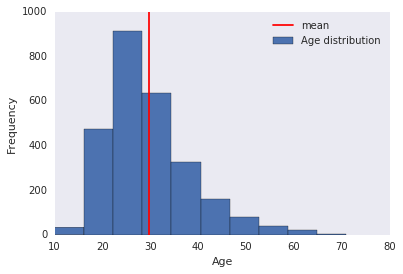

In [70]:
%matplotlib inline
potentional_customers["Age"].plot.hist(grid = False, label = "Age distribution")
plt.axvline(potentional_customers["Age"].mean(), color = "red", label = "mean")
plt.xlabel("Age")
plt.legend()

Now, we would like to know which countries the most frequent among all countries. This will help us to determine on which country it's the best to focus on.

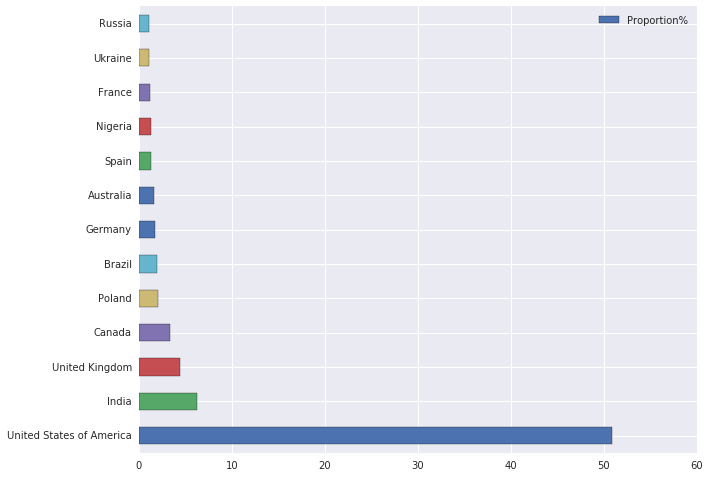

In [86]:
countries_freq = potentional_customers["CountryLive"].value_counts(normalize = True).sort_values(ascending = False).apply(lambda x: round(x * 100,2))
countries_freq = countries_freq[countries_freq[:] > 1]
countries_freq.plot.barh(label = "Proportion%", figsize = (10,8))
plt.legend()

As we can see US has 51% followed by India with 7%, and UK with 4%. We can conclude that company should focus on audince from these countries.
Let's see the gender distribution

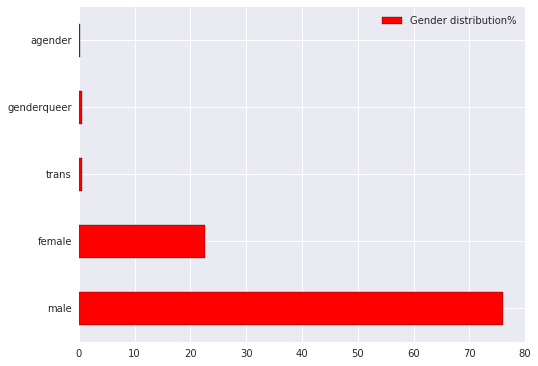

In [92]:
gender_freq = potentional_customers["Gender"].value_counts(normalize = True).sort_values(ascending = False).apply(lambda x: round(x * 100,2))
gender_freq.plot.barh(label = "Gender distribution%", figsize = (8,6), color = "red")
plt.legend()

We have proportion of male around 76% and female around 22%.
Let's figure what kind of education have our sample

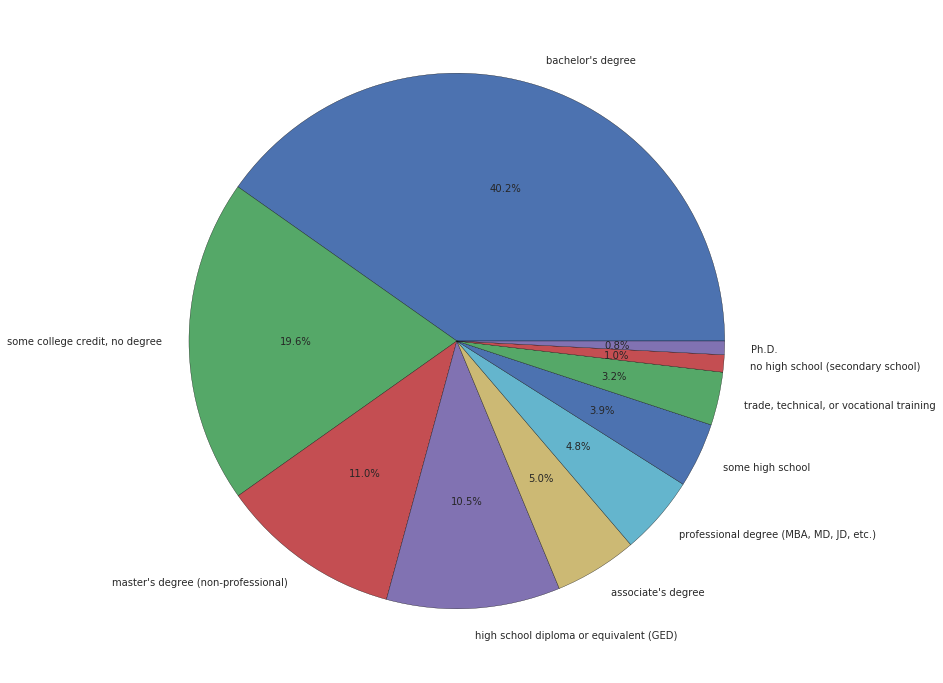

In [103]:
education_dist = potentional_customers["SchoolDegree"].value_counts(normalize = True).sort_values(ascending = False).apply(lambda x: round(x * 100, 2))
education_dist.plot.pie(figsize = (12,12), autopct = "%1.1f%%", label = "")

We can see that 60% from sample has a at least university degree, 20% college credits, 10% high school diploma, etc.
The next step is find the average amount of money that country can spend on courses.

In [111]:
country_budgets = potentional_customers[["CountryLive", "MoneyForLearning"]].groupby(by="CountryLive").mean().sort_values(by="MoneyForLearning", ascending=False)
country_budgets.head()

,MoneyForLearning
CountryLive,
Sri Lanka,2600.000000
Niger,2514.500000
Taiwan,2470.000000
Israel,2309.500000
Portugal,1955.714286


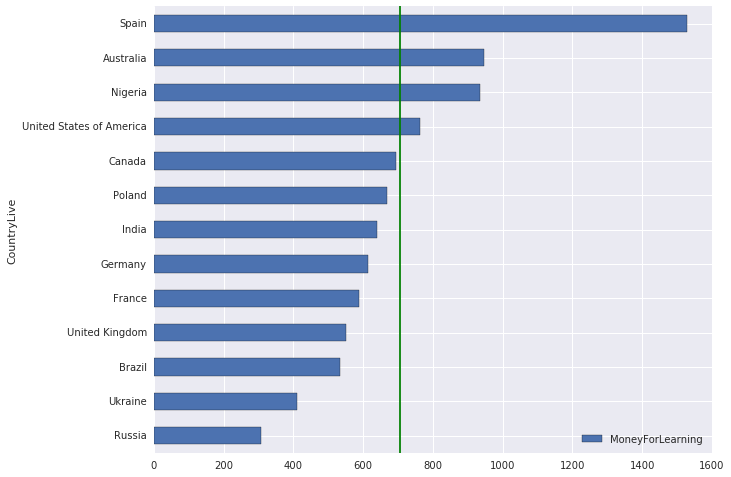

In [122]:
selected_countries = [x for x in countries_freq.index]

top_countries_budget = country_budgets.loc[selected_countries].sort_values(by = "MoneyForLearning")
top_countries_budget.plot.barh(label = "Average amount money for learning", figsize = (10,8))
plt.axvline(top_countries_budget["MoneyForLearning"].mean(), label = "mean", color = "green")

Spain, Australia, Nigeria, US are ready to spend money more than average countries. Now, let's multiply countries budget with population

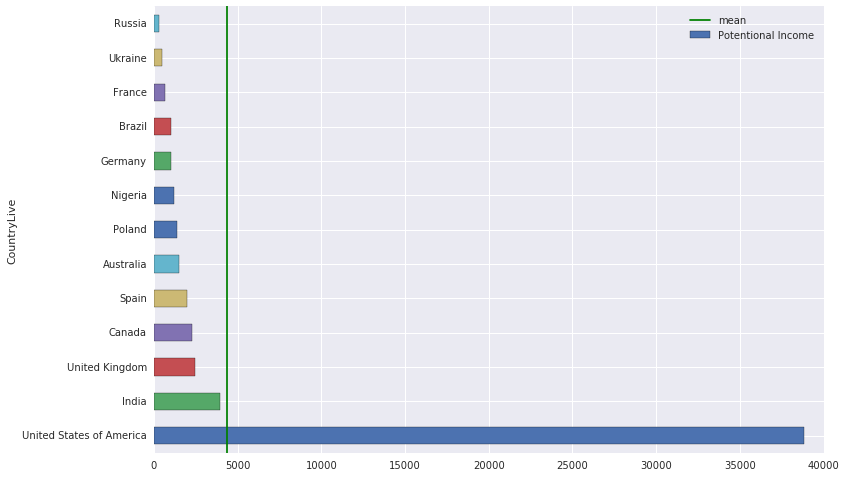

In [149]:
potentional_income = top_countries_budget.join(countries_freq)
potentional_income.rename({"CountryLive" : "Percentage"}, axis = 1, inplace = True)
potentional_income["Income"] = round(potentional_income["MoneyForLearning"] * potentional_income["Percentage"], 1)
potentional_income.sort_values(by = "Income", axis= 0,ascending = False, inplace = True)
potentional_income["Income"].plot.barh(figsize = (12,8), label = "Potentional Income")
plt.axvline(potentional_income["Income"].mean(), label = "mean", color = "green")
plt.legend()

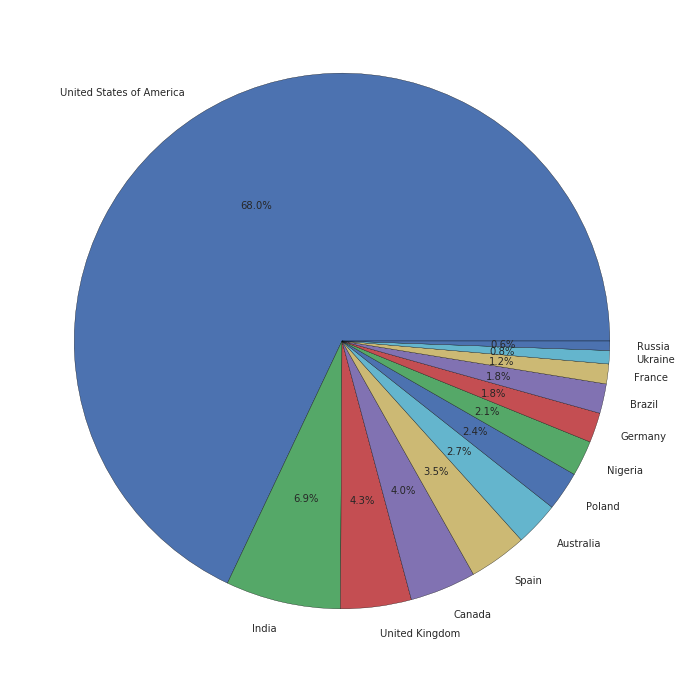

In [152]:
potentional_income["Income"].plot.pie(figsize = (12,12), autopct = "%1.1f%%", label = "")

We can see that the highest potentional income comes from US, followed by India and UK. Top-5 ends with Canada and Spain

# Conclusion

- Investing in US, India, UK, Canada, and Spain can bring the highest amount of money
- More than 70% of audience are Male
- The average age of potentional customer is 30 y.o.
- at least 60% of our sample has university degree